# Covid 19 Prediction using Lung CT Scan

## Author: Reno Noel C


# Importing the required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Clone and Explore dataset

In [2]:
main_dir = "D:/Internship/Project_1/datasets-master/datasets-master/Data"
train_dir = os.path.join("D:/Internship/Project_1/datasets-master/datasets-master/Data/train")
test_dir = os.path.join("D:/Internship/Project_1/datasets-master/datasets-master/Data/test")

train_covid_dir = os.path.join("D:/Internship/Project_1/datasets-master/datasets-master/Data/train/COVID19")
train_noncovid_dir = os.path.join("D:/Internship/Project_1/datasets-master/datasets-master/Data/train/NORMAL")

test_covid_dir = os.path.join("D:/Internship/Project_1/datasets-master/datasets-master/Data/test/COVID19")
test_noncovid_dir = os.path.join("D:/Internship/Project_1/datasets-master/datasets-master/Data/test/NORMAL")

In [3]:
# print file name

train_covid_names = os.listdir(train_covid_dir)
train_noncovid_names = os.listdir(train_noncovid_dir)

test_covid_names = os.listdir(test_covid_dir)
test_noncovid_names = os.listdir(test_noncovid_dir)

In [4]:
# Total images in train and test

print("Total images present in the training set: ", len(train_covid_names + train_noncovid_names))
print("Total images present in the testing set: ", len(test_covid_names + test_noncovid_names))

Total images present in the training set:  1811
Total images present in the testing set:  484


# Data Visualization 

['D:/Internship/Project_1/datasets-master/datasets-master/Data/train/COVID19\\COVID-19 (1).jpeg', 'D:/Internship/Project_1/datasets-master/datasets-master/Data/train/COVID19\\COVID-19 (1).png', 'D:/Internship/Project_1/datasets-master/datasets-master/Data/train/COVID19\\COVID-19 (10).jpeg', 'D:/Internship/Project_1/datasets-master/datasets-master/Data/train/COVID19\\COVID-19 (101).jpg', 'D:/Internship/Project_1/datasets-master/datasets-master/Data/train/COVID19\\COVID-19 (107).jpg', 'D:/Internship/Project_1/datasets-master/datasets-master/Data/train/COVID19\\COVID-19 (11).jpeg', 'D:/Internship/Project_1/datasets-master/datasets-master/Data/train/COVID19\\COVID-19 (11).jpg', 'D:/Internship/Project_1/datasets-master/datasets-master/Data/train/COVID19\\COVID-19 (12).jpeg']
['D:/Internship/Project_1/datasets-master/datasets-master/Data/train/NORMAL\\NORMAL(0).jpg', 'D:/Internship/Project_1/datasets-master/datasets-master/Data/train/NORMAL\\NORMAL(1).jpg', 'D:/Internship/Project_1/datasets-

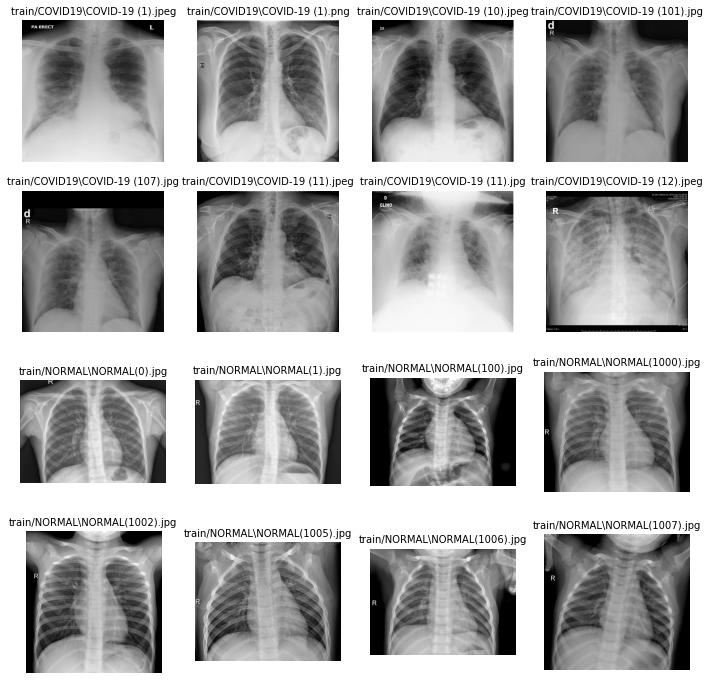

In [5]:
# Plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
# Set the number of columns and rows
rows = 4
cols = 4
# Set the figure size 
fig = plt.gcf()
fig.set_size_inches(12,12)
# Get the filenames from the Covid & Normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]
noncovid_pic = [os.path.join(train_noncovid_dir,filename)for filename in train_noncovid_names[0:8]]
# Print the list
print(covid_pic)
print(noncovid_pic)
# Merge the Covid and Normal List
merged_list = covid_pic+noncovid_pic
for i, img_path in enumerate(covid_pic+noncovid_pic):
    data = img_path.split('/',6)[6]
    sp = plt.subplot(rows,cols,i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    sp.set_title(data,fontsize=10)
    plt.imshow(img,cmap='gray')
    
plt.show()

# Data Preprocessing & Augmentation

In [8]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2,
                                zoom_range=0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                target_size=(150,150),
                                                subset='training',
                                                batch_size = 32,
                                                class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                target_size=(150,150),
                                                subset='validation',
                                                batch_size = 32,
                                                class_mode = 'binary')
test_generator = dgen_test.flow_from_directory(test_dir,
                                                target_size=(150,150),
                                                batch_size = 32,
                                                class_mode = 'binary')


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [9]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [10]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# Build Convolutional Neural Network Model

In [11]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# Compile & Train the Model

In [12]:
#compile the model
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\reno_\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [13]:
#train the model
history=model.fit(train_generator,
                 epochs=30,
                 validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 168s 4s/step - loss: 0.9518 - accuracy: 0.7605 - val_loss: 0.5124 - val_accuracy: 0.8564
Epoch 2/30
46/46 [==============================] - 110s 2s/step - loss: 0.2558 - accuracy: 0.9034 - val_loss: 0.1804 - val_accuracy: 0.9530
Epoch 3/30
46/46 [==============================] - 105s 2s/step - loss: 0.1632 - accuracy: 0.9413 - val_loss: 0.1129 - val_accuracy: 0.9751
Epoch 4/30
46/46 [==============================] - 109s 2s/step - loss: 0.1493 - accuracy: 0.9517 - val_loss: 0.1337 - val_accuracy: 0.9696
Epoch 5/30
46/46 [==============================] - 109s 2s/step - loss: 0.1343 - accuracy: 0.9531 - val_loss: 0.1551 - val_accuracy: 0.9586
Epoch 6/30
46/46 [==============================] - 109s 2s/step - loss: 0.1201 - accuracy: 0.9572 - val_loss: 0.0939 - val_accuracy: 0.9696
Epoch 7/30
46/46 [==============================] - 106s 2s/step - loss: 0.1140 - accuracy: 0.9593 - val_loss: 0.0947 - val_accuracy: 0.9724
Epoch 8/30
46

# Performance Evaluation

In [14]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

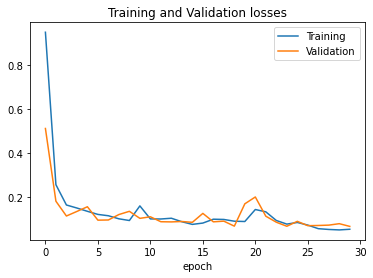

In [15]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

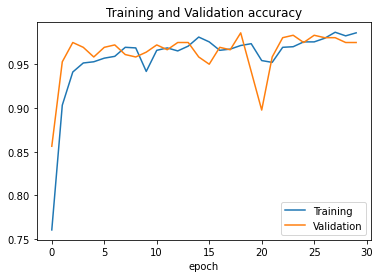

In [16]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [17]:
# get the test acuarcy and loss
test_loss , test_acc = model.evaluate(test_generator)
print('test loss: {} test acc: {}'.format(test_loss,test_acc))

16/16 [==============================] - 38s 2s/step - loss: 0.0507 - accuracy: 0.9814
test loss: 0.050737008452415466 test acc: 0.9814049601554871


# Prediction on New Data

D:/Internship/Project_1/datasets-master/datasets-master/Data/test/COVID19/COVID-19 (767).jpg


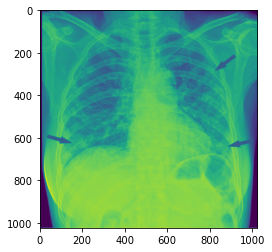

Covid is detected


In [31]:
from PIL import Image  
from tensorflow.keras.preprocessing import image
img_path = input()
plt.imshow(img)
plt.show()
img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_batch)

if prediction ==0:
     print("Covid is detected")
else:
    print("Covid is not detected")

D:/Internship/Project_1/datasets-master/datasets-master/Data/test/NORMAL/NORMAL(49).jpg


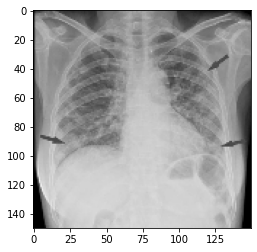

Covid is not detected


In [32]:
from PIL import Image  
from tensorflow.keras.preprocessing import image
img_path = input()
plt.imshow(img)
plt.show()
img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_batch)

if prediction ==0:
     print("Covid is detected")
else:
    print("Covid is not detected")